# Annotation Analysis: ALL (Complete Dataset)

Analysis with corrected aggregation by _unit_id.

In [5]:
# Load data and compute statistics
import sys
sys.path.append('.')
from analysis_utils import (
    load_processed_data, overall_agreement, 
    agreement_by_language, fleiss_kappa_overall_and_by_lang_correct,
    plot_overall_llm_vs_human, plot_by_language_llm_vs_human,
    sample_english_aligned_examples, STANDARD_LABELS
)

aggregated = load_processed_data()

print(f'=== DATASET ===')
print(f'Unique sentences: {len(aggregated)}')
print(f'Languages: {aggregated["language"].value_counts().to_dict()}')


print(f'\\n=== AGREEMENT & KAPPA ===')
print(f'Overall agreement: {overall_agreement(aggregated):.1f}%')
lang_agreement = {k: round(v, 1) for k, v in agreement_by_language(aggregated).items()}
print(f'By language: {lang_agreement}')
fleiss_overall, fleiss_by_lang = fleiss_kappa_overall_and_by_lang_correct(aggregated)
print(f'Fleiss Kappa: {fleiss_overall:.3f}')
lang_kappa = {k: round(v, 3) for k, v in fleiss_by_lang.items()}
print(f'By language: {lang_kappa}')

print(f'\\n=== LLM ACCURACY ===')
total = len(aggregated)
correct = len(aggregated[aggregated['llm_label'] == aggregated['human_label']])
print(f'{correct}/{total} ({correct/total*100:.1f}%)')

Loading from processed.csv...
=== DATASET ===
Unique sentences: 733
Languages: {'DE': 300, 'EN': 220, 'UA': 213}
\n=== AGREEMENT & KAPPA ===
Overall agreement: 55.0%
By language: {'EN': 48.6, 'DE': 58.3, 'UA': 56.8}
Fleiss Kappa: nan
By language: {'EN': nan, 'DE': nan, 'UA': nan}
\n=== LLM ACCURACY ===
403/733 (55.0%)


=== PLOTS ===


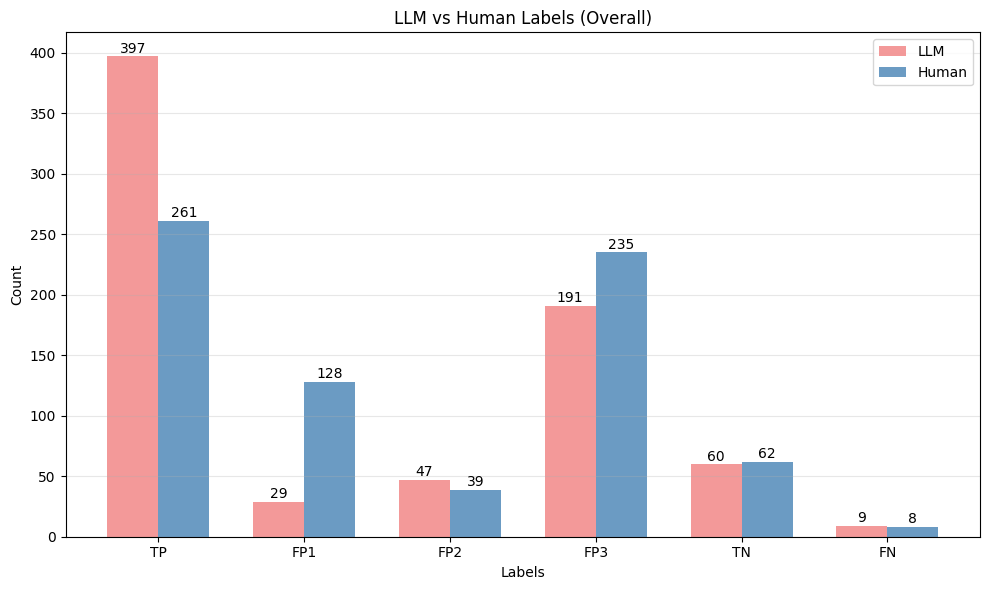

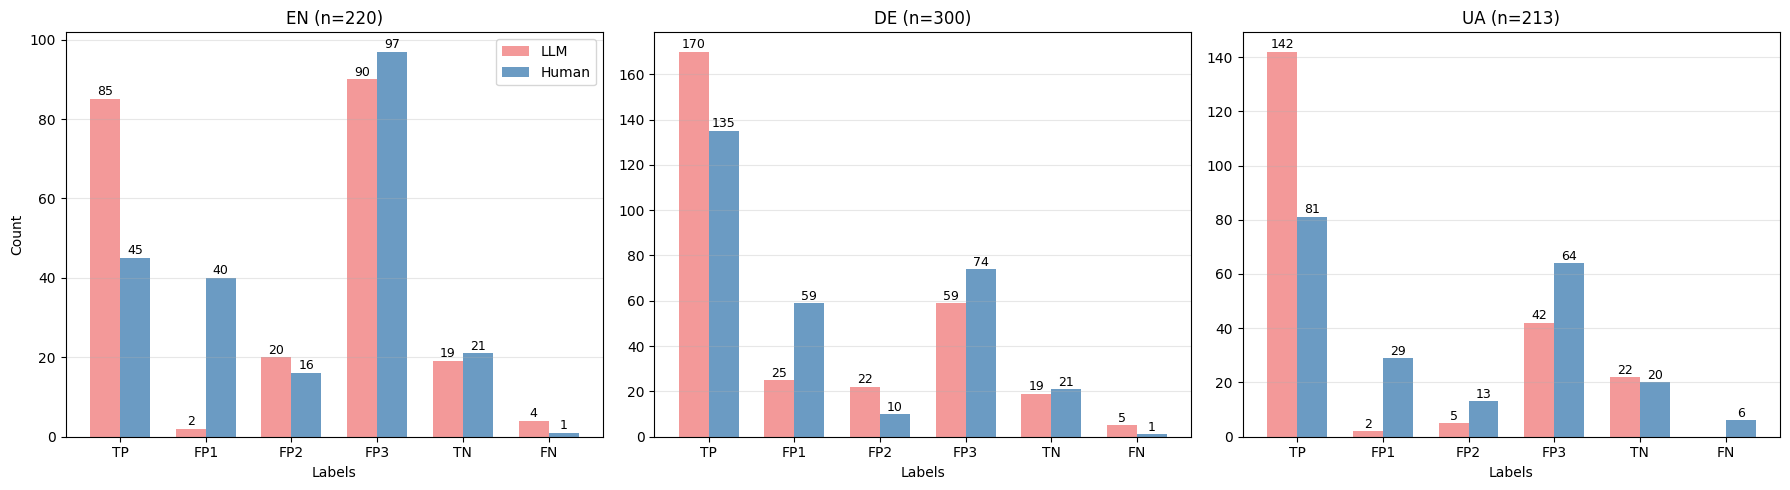

In [6]:
# Visualizations
print('=== PLOTS ===')
plot_overall_llm_vs_human(aggregated)
plot_by_language_llm_vs_human(aggregated)

In [7]:
# Sample Examples (New Format)
print('=== EXAMPLES ===')
examples = sample_english_aligned_examples(aggregated, n_per_label=3)
for label in STANDARD_LABELS:
    if label in examples and examples[label]:
        print(f'\\n{label}:')
        for i, example in enumerate(examples[label]):
            print(f'  {i+1}. {example}')
            if i < len(examples[label]) - 1:
                print('     ---')
    else:
        print(f'\\n{label}: No examples')

=== EXAMPLES ===
\nTP:
  1. {Took=>For some reason, I kept the:::llm_FP2:::human_TP(TP:2,FP2:1)} ticket in my pocket{ for some reason,=> and:::llm_TP:::human_TP(TP:3)} went to a party near Cambridge. [LLM: FP2, Human: TP]
     ---
  2. {Swedish Motivation=>:::llm_TP:::human_TP} I actually {maintain=>practice:::llm_TP:::human_TP(TP:3)} my {french=>French:::llm_TP:::human_TP(TP:3)} with music when I don't have anyone {I talk french with=>to converse with in French,:::llm_TP:::human_TP(TP:3)} so I highly recommend this! [LLM: TP, Human: TP]
     ---
  3. {Yeah that’s fair,=>That’s a fair point;:::llm_FP3:::human_TP(TP:3)} the national parks {are a hassle=>can be difficult:::llm_TP:::human_TP(TP:2,FP3:1)} to {get=>access:::llm_TP:::human_TP(TP:3)} from Zanzibar. [LLM: FP3, Human: TP]
\nFP1:
  1. {This=>This is not a subsidy; this:::llm_FP1:::human_FP1(FP1:1)} is why you need to read up on the subject. [LLM: FP1, Human: FP1]
     ---
  2. Megathread: Job Offer Status Incoming Ignorance: {Cu